# <b>INTRODUCTION

<b>Title: Bellabeat Case Study

<b>Author: Edline Dallal

<b>Date: November 2022



# Bellabeat: How can a wellness Technology company play it smart?


# <B>1) ASK
#### 1.0 Background

<b>This case study is part of my self study and practicing data analysis. The project chosen is a Capstone Project of Google Analytics Professional Certificate. 
    
Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. 

#### 1.2 Business Task:
Analyze FitBit Fitness Tracker Data(the dataset in Kaggle) to gain insights into how consumers are using the FitBit app and discover trends and insights for Bellabeat marketing strategy.
#### 1.3 Business Questions:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?



# <B>2) PREPARE
<b> 1. The data is publicly available on Kaggle: https://www.kaggle.com/datasets/arashnic/fitbit.
This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. 
    
<b> 2. The following file is selected and copied for analysis.

  - <b> dailyActivity_merged.csv
    
<b> 3.  The Environment used in this dataset is:   
- pandas
- numpy
- datetime
- seaborn
- textblob
- matplotlib.pyplot  

# <B>3) PROCESS

In [1]:
#importing libraries
import numpy as np # data arrays
import pandas as pd #data structure and data analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import datetime as dt # date time

In [2]:
#reading the file in CSV format
df = pd.read_csv('dailyActivity_merged.csv')
# preview first 10 rows with all columns
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


<b>Discover the data, check the columns, how many rows, how many columns, what data are in each column 

<b>Data cleaning
- Checking for errors
- Convert the data/ columns into the right type
- Check for null value and decide how to handle them(to delete or converts to zeros)
- Check for duplicates

In [3]:
#count the null values and save it in null_values
null_values = df.isnull().sum()

# preview the null
null_values[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

<b> After checking all the columns, there is no null values in the dataset

In [4]:
# get the info of the dataframe by using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

<b> reviewing the dtype columns, there is only one object dtype column, the rest are int or floats.<br>The columns 'ActivityDate" needs to be transformed to datetime. 

In [5]:
#get the dataframe shape
df.shape

(940, 15)

In [6]:
# count distinct values of "Id" column
print('The dataframe has',len(pd.unique(df["Id"])),'unique Ids')

The dataframe has 33 unique Ids


In [7]:
# convert "ActivityDate" to datatime64 dtype
df["ActivityDate"] = pd.to_datetime(df["ActivityDate"], format="%m/%d/%Y")

# print the first 5 rows of "ActivityDate" to confirm the format and the type of the columns
df["ActivityDate"].head(2) 

0   2016-04-12
1   2016-04-13
Name: ActivityDate, dtype: datetime64[ns]

In [8]:
#CREATE NEW COLUMNS 

# create new column "day_of_week"
df['day_of_week'] = df['ActivityDate'].dt.day_name()

# create new column "month"
df['month'] = df['ActivityDate'].dt.month_name()

# create new column sum of total minutes
df["total_mins"] = df["VeryActiveMinutes"] + df["FairlyActiveMinutes"] + df["LightlyActiveMinutes"] + df["SedentaryMinutes"]

# create new column sum of total hours
df['total_hours']= round(df["total_mins"]/60, 1)

In [12]:
#rename columns to insert separator between words and lower the column's names
df.rename(columns = {"Id":"id", "ActivityDate":"date", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

# create new list of rearranged columns
new_cols = ['id', 'date','month','day_of_week', "total_steps", "total_dist","total_mins", "total_hours", "calories","track_dist", "logged_dist", "very_active_dist", "moderate_active_dist", "light_active_dist", "sedentary_active_dist", "very_active_mins", "fairly_active_mins", "lightly_active_mins", "sedentary_mins"]
           
# reindex function to rearrange columns based on "new_cols"
df = df.reindex(columns=new_cols)

#print 5 first row by using head function to check all the changes 
df.head(10)

,id,date,month,day_of_week,total_steps,total_dist,total_mins,total_hours,calories,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins
0,1503960366,2016-04-12,April,Tuesday,13162,8.50,1094,18.2,1985,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728
1,1503960366,2016-04-13,April,Wednesday,10735,6.97,1033,17.2,1797,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776
2,1503960366,2016-04-14,April,Thursday,10460,6.74,1440,24.0,1776,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218
3,1503960366,2016-04-15,April,Friday,9762,6.28,998,16.6,1745,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726
4,1503960366,2016-04-16,April,Saturday,12669,8.16,1040,17.3,1863,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773
5,1503960366,2016-04-17,April,Sunday,9705,6.48,761,12.7,1728,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539
6,1503960366,2016-04-18,April,Monday,13019,8.59,1440,24.0,1921,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149
7,1503960366,2016-04-19,April,Tuesday,15506,9.88,1120,18.7,2035,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775
8,1503960366,2016-04-20,April,Wednesday,10544,6.68,1063,17.7,1786,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818
9,1503960366,2016-04-21,April,Thursday,9819,6.34,1076,17.9,1775,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838


In [10]:
#get the new shape of dataframe 
df.shape

(940, 19)

#### <b>preparation steps needed: 
- <b> The Dataframe has no null values<br>
- <b> Dataframe has first 940 rows and 15 columns, the new dataframe has 940 rows and 19 columns (4 new columns)
- <b> The dataframe includes 33 unique Id<br>
- <b> The 'ActivityDate' dtype changed to datetime64 dtype<br>
- <b> create  new columns, day of week, month, total mintues and total hours<br>
- <b> rename of columns <br>
- <b> rearrange columns 

# <B>4) ANALYZE

In [11]:
#get statistics of the data 
df.describe()

,id,total_steps,total_dist,total_mins,total_hours,calories,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,1218.753191,20.312340,2303.609574,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638
std,2.424805e+09,5087.150742,3.924606,265.931767,4.432326,718.166862,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437
min,1.503960e+09,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,989.750000,16.500000,1828.500000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000
50%,4.445115e+09,7405.500000,5.245000,1440.000000,24.000000,2134.000000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000
75%,6.962181e+09,10727.000000,7.712500,1440.000000,24.000000,2793.250000,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000
max,8.877689e+09,36019.000000,28.030001,1440.000000,24.000000,4900.000000,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000


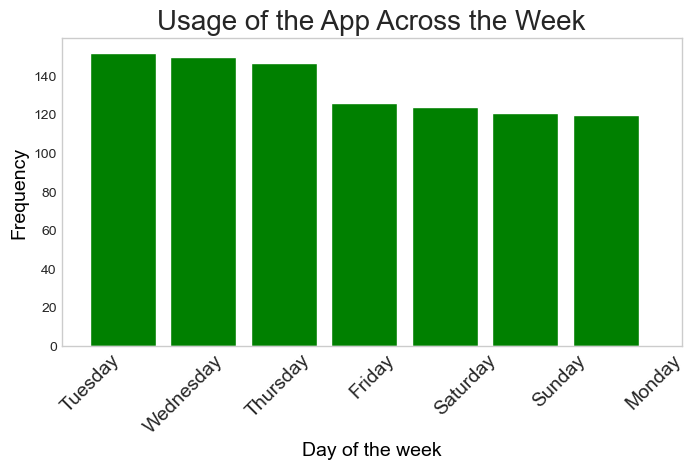

In [122]:
#histogram plot
#size, style, grid and title
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
plt.grid(False)

#set the plot 
plt.hist(df.day_of_week, bins = 7, 
         width = 0.7, color = "green")


#set labes,title and legend 
plt.xlabel("Day of the week", color= 'black', size= 14)
plt.xticks(rotation=45, size= 14)
plt.ylabel("Frequency", color= 'black', size= 14)
plt.title("Usage of the App Across the Week", size= 20)

#show the plot
plt.show()

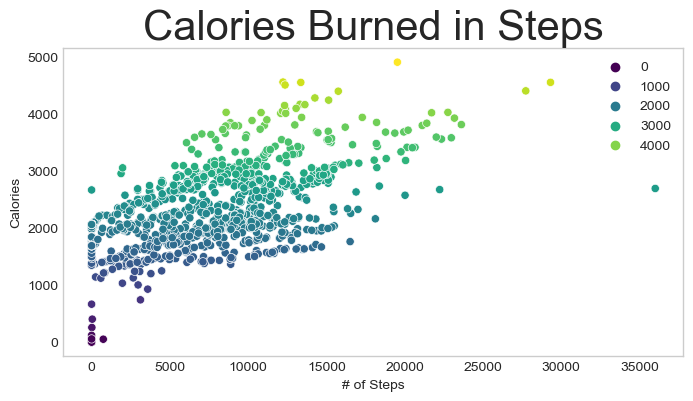

In [119]:
#scatter plot
#size, style, grid and title
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
plt.grid(False)

#set the plot 
sns.scatterplot(data=df, x='total_steps', y='calories', hue = 'calories',  palette = 'viridis')

#set labes,title and legend 
plt.xlabel("# of Steps")
plt.ylabel("Calories")
plt.title("Calories Burned in Steps", size= 30)
plt.legend()

#show the plot
plt.show()

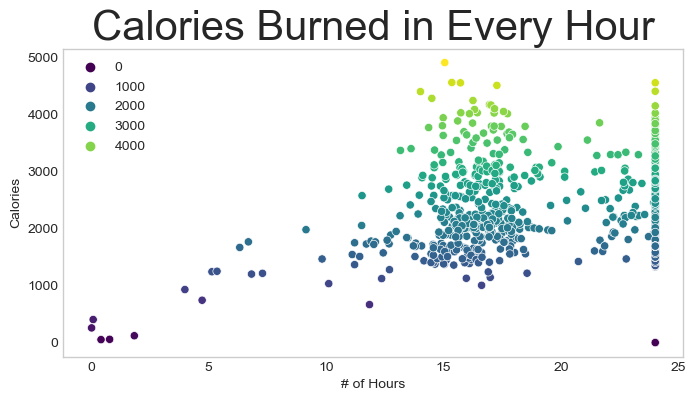

In [120]:
#scatter plot
#size, style, grid and title
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
plt.grid(False)

#set the plot 
sns.scatterplot(data=df, x='hours', y='calories', hue = 'calories',  palette = 'viridis')

#set labes, title and legend 
plt.xlabel("# of Hours")
plt.ylabel("Calories")
plt.title("Hourly Calories Burned", size= 30)
plt.legend()

#show the plot
plt.show()

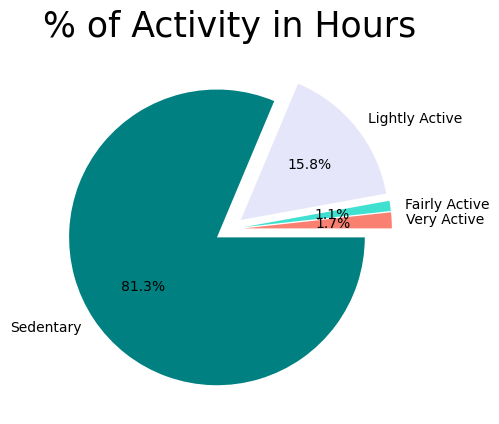

In [123]:
# create sum of each usage in minutes and convert to hours 
very_active_mins = df["very_active_mins"].sum()/60
fairly_active_mins = df["fairly_active_mins"].sum()/60
lightly_active_mins = df["lightly_active_mins"].sum()/60
sedentary_mins = df["sedentary_mins"].sum()/60

# pie chart to show the percent size of each usage minutes
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very Active", "Fairly Active", "Lightly Active", "Sedentary"]
colours = ["salmon", "turquoise", "lavender", "teal"]
explode = [0.1, 0.1, 0.1, 0.1]

#size, style, grid and title
plt.style.use("default")


#set the plot 
plt.pie(slices, #slices data 
        labels = labels, # labes names 
        colors = colours, #color of slices 
        explode = explode, # distance of slices from each otehr 
        autopct = "%1.1f%%") # labes on pie 

#set title 
plt.title("% of Activity in Hours", size= 25) 

#show the plot
plt.show() 

# <B>5) SHARE


## <b>Interesting data from the analysis above: 
- <b>Total steps average 7638 steps 
- <b>Total distance average is 5.5 Km
- <b>The measure "very active distination" on average is 1.5 Km
- <b>The measure total "sedentary minutes" average is 21 minutes
- <b>The measure total "very active minutes" average is 991 minutes or 16.5 hours
- <b> Average hours of using the app 20 hours or 1218 minutes
      
  
## <b> Analyzing the data & charts:    
    
-  <b>The average usage of the app if high, it stands on 20.3, which mean that the users use the app very frequently. 
- <b>The numbers of usage in each mode tells us about the usage of the app as fitness app, people who use the app don't use it for sport purposes. 
clearly we can see the highest  minutes the users use the app are in sedentary mode while the very active minutes in the app are very low (21 mins). 
same as the measure of the very active distination that also is very low (1.5Km). 


- <b>  The histogram plot "Usage of the App Across the Week" shows the pattern of using the app in weekdays and not on week ends, the users use the app less in weekends starts from friday and continue in this usage till monday. 
- <b>  The pie chart "% of Activity in Hours" revelas the % of each mode, the biggest slice is in sedentary mode that stands on 81% from total hours of usage.  Comparison to the Very Active mode, the difference is very big, the "very active" mode ratio is only 1.7%, this number is extremly low for an app that suppose to be a health app for active usage and sports.  
- <b> Analyzing the scatter plot "Hourly Calories Burned" teaches us about the relation between hours of usage and calories burned by users. the correlation between the two aspects is clearly positive, but is not strong, which mean, increasing the usage of the app by users, even to 15-20 hours a day doesn't necessarily increase the calories burned, this values is due to the usage of the app in sedentary mode which was most of the time.   
    
- <b> The scatter plot "Calories Burned in Steps" shows the relation between the counts of steps to the calories buned by users, the correlation is positive, increasing the number os steps definitely increases the calories burned, as we can see, the major user's steps are  on average 7000 steps, the number is not low, the average of 75% of the users  is 10727. 
   
 <br>   

    
## <b>Conclusions and Recommendations:     

- <b> The users of the app do not use it for intense sport activity. Although the purpose of the application is to record and analyze athletic performance and health, the users hardly ever perform intense sport activities such as long-distance running, training, light jogging, etc.    
- <b> Growth of the user's steps leads to increase in calories burned.
- <b> It seems that the main use of the users is in the middle of the week, on weekends the users do not use the app. 
 <br>   
##### 1.<b> What are the trends identified? 
- <b>Sedentary minutes takes the biggest slice at 81.3% while very active minutes takes a very small percent at 1.7% only. 
- <b>It seems that the main use of the users is in the middle of the week, on weekends the users do not use the app. 
- <b>  Increasing the usage of the app by users doesn't necessarily increase the calories burned.
    
##### 2. <b>How could these trends apply to Bellabeat customers?
- <b>these trends can apply to Bellabeat customers very much since the two app have the same type of users and produce the same product. 

##### 3. <b> How could these trends help influence Bellabeat marketing strategy?
- <b>Learning from the analysis, these trends can help the Bellabeat market team to promote and build campaigns depends on these trends, such as: 
- <b>Promote using the app on weekends
- <b>Encourage the users to burn calories by increasing activity to achieve levels in the app, these levels could give the users benefits and promotions. 
- <b>Encourage users to be more active by building a personal program. 
-<b> Connect to other applications for promotion 

